In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_margins(csv_file):
    # Read CSV file into a DataFrame
    df = pd.read_csv(csv_file, header=None, names=['Model', 'Dataset'] + [f'Margin_{i}' for i in range(1, 100)])

    # Calculate mean, std, and count for each combination
    df['Mean'] = df.iloc[:, 2:].mean(axis=1)
    df['Std'] = df.iloc[:, 2:].std(axis=1)
    df['Count'] = df.iloc[:, 2:].count(axis=1)  # Count non-NaN values

    # Plot all margins
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Dataset', y='Mean', hue='Model', data=df, showfliers=False)
    plt.scatter(df['Dataset'], df['Mean'], marker='o', color='red', label='Mean')
    plt.errorbar(df['Dataset'], df['Mean'], yerr=df['Std'], fmt='none', color='red', capsize=5, label='Std Dev')
    
    # Annotate with counts
    for i, row in df.iterrows():
        plt.text(i, row['Mean'], f'Count: {row["Count"]-2}', ha='center', va='bottom', color='blue', fontsize=8)
    
    plt.show()



In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_normalized_pmf(csv_file):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_file, header=None, names=['Model', 'Dataset'] + list(range(1, 13)))

    # Iterate through each row in the DataFrame and create plots
    for index, row in df.iterrows():
        model = row['Model']
        dataset = row['Dataset']
        margins = row[2:].dropna().astype(float)

        # Normalize margins to have zero mean and unit variance
        normalized_margins = (margins - margins.mean()) / margins.std()

        # Plot the normalized pmf using a histogram
        plt.figure()
        plt.hist(normalized_margins, bins=20, density=True, alpha=0.6, color='g')

        # Fit a normal distribution to the data
        mu, std = norm.fit(normalized_margins)
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2)

        # Set labels and title
        plt.title(f'Model: {model}, Dataset: {dataset}')
        plt.xlabel('Normalized Margin Values')
        plt.ylabel('Probability Density')

        # Show the plot or save it to a file
        plt.show()

posx and posy should be finite values
posx and posy should be finite values


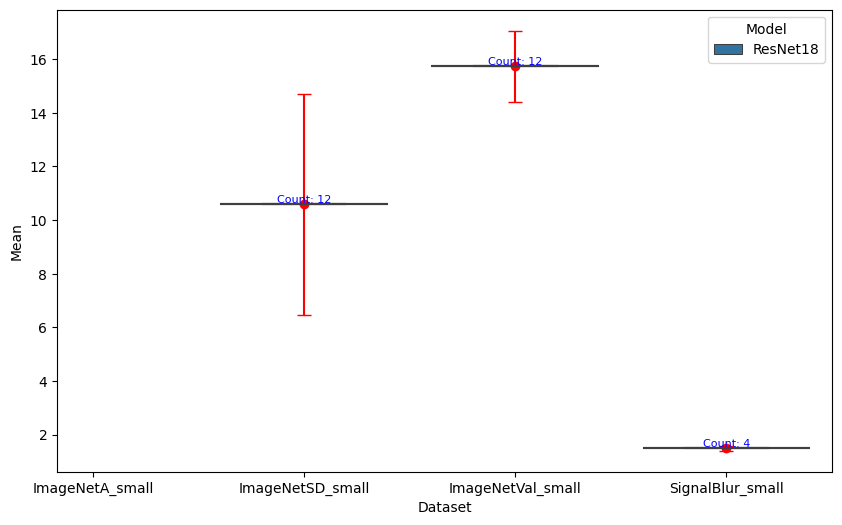

In [4]:
# Example usage
plot_margins('results\CambioMargin_1\margin_ResNet18.csv')

C:\Users\juanm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
C:\Users\juanm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:419: RuntimeWarning: Mean of empty slice.
  loc = data.mean()
C:\Users\juanm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\juanm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_continuous_distns.py:424: RuntimeWarning: Mean of empty slice.
  scale = np.sqrt(((data - loc)**2

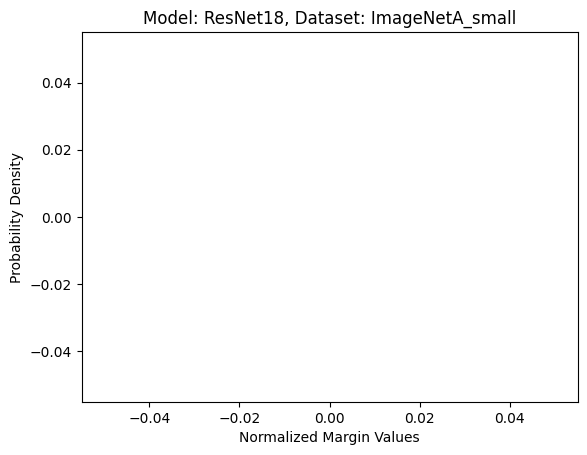

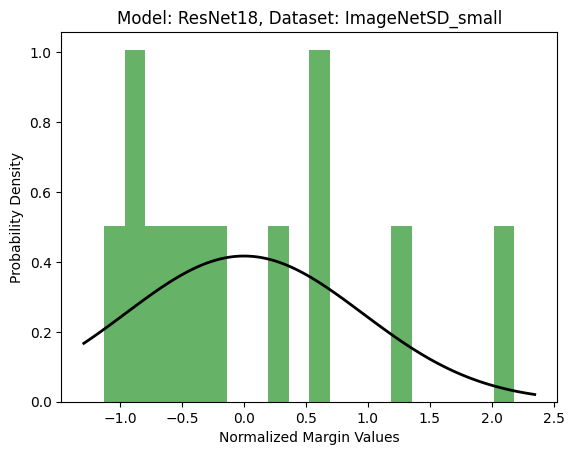

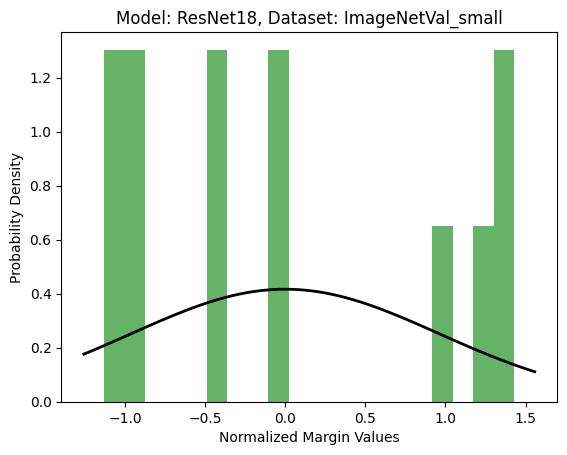

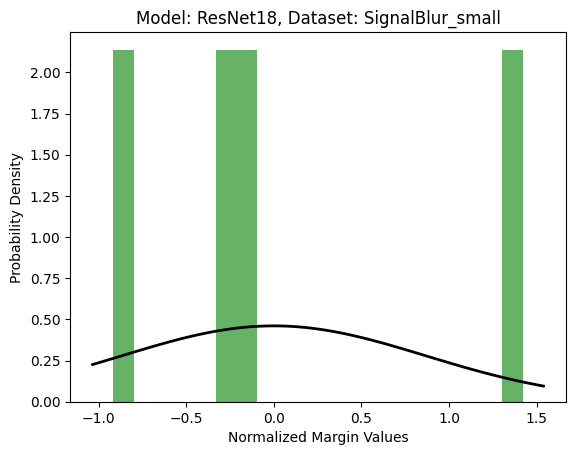

In [12]:
plot_normalized_pmf('results\CambioMargin_1\margin_ResNet18.csv')

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_combination_margins(csv_path):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(csv_path, header=None)

    # Group the DataFrame by the first two columns (model and dataset)
    grouped = df.groupby([0, 1])

    # Initialize the plot
    fig, ax = plt.subplots()

    # Iterate through the groups and plot the number of margins elements for each combination
    for name, group in grouped:
        model, dataset = name
        margins_values = group.iloc[:, 2:].values.flatten()
        num_elements = len(margins_values)
        mean_value = np.mean(margins_values)
        std_value = np.std(margins_values)

        # Plot the number of margins elements
        ax.scatter(num_elements, 0, label=f"{model}, {dataset}", marker='o')

        # Mark the mean and std on the plot
        ax.text(num_elements, mean_value, f'Mean: {mean_value:.2f}', rotation=45)
        ax.text(num_elements, std_value, f'Std: {std_value:.2f}', rotation=45)

    # Set plot labels and title
    ax.set_xlabel('Number of Margins Elements')
    ax.set_ylabel('Margin Values')
    ax.set_title('Number of Margins Elements for Each Combination')

    # Show legend
    ax.legend()

    # Show the plot
    plt.show()
plot_combination_margins(csv_path)


ParserError: Error tokenizing data. C error: Expected 2 fields in line 2, saw 14


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

def plot_combined(csv_file):
    # Read CSV file into a DataFrame
    df = pd.read_csv(csv_file, header=None, names=['Model', 'Dataset'] + [f'Margin_{i}' for i in range(1, 13)])

    # Calculate mean and standard deviation for each combination
    df['Mean'] = df.iloc[:, 2:].mean(axis=1)
    df['Std'] = df.iloc[:, 2:].std(axis=1)

    # Create a new column for all margin values
    all_margins = df.iloc[:, 2:].values.flatten()

    # Plot individual margins
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Model', y='Value', hue='Dataset',
                data=pd.melt(df, id_vars=['Model', 'Dataset'], value_vars=df.columns[2:-2], var_name='Margin', value_name='Value'))
    plt.title('Individual Margins for each Combination')
    plt.show()

    # Plot mean and std for each combination
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Model', y='Mean', hue='Dataset', data=df)
    plt.title('Mean Margin for each Combination')
    plt.show()

    # Plot normalized pmf of all margin values
    plt.figure(figsize=(12, 6))
    sns.histplot(all_margins, kde=True, stat='density', bins=20, color='skyblue')
    plt.title('Normalized PMF of All Margin Values')
    plt.xlabel('Margin Value')
    plt.ylabel('Density')
    plt.show()




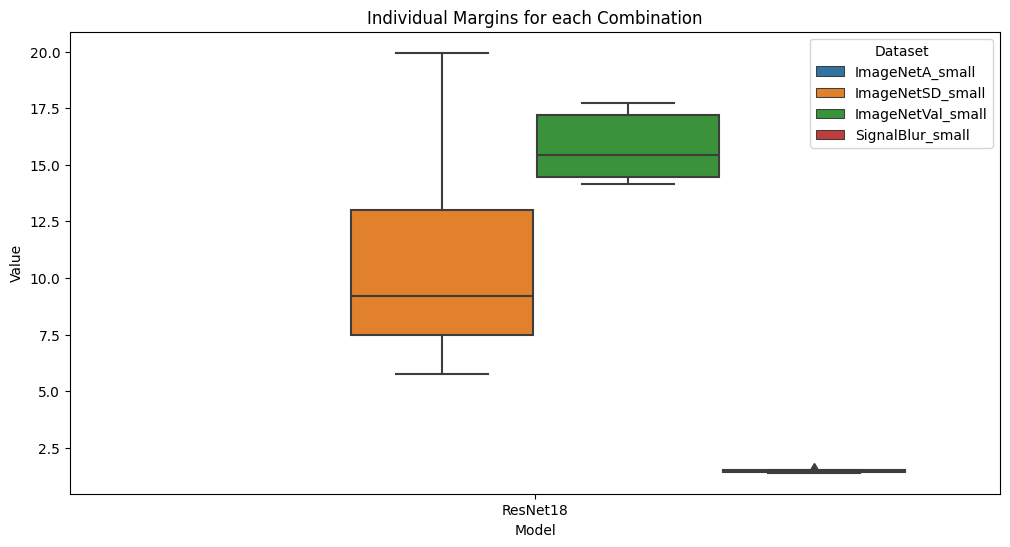

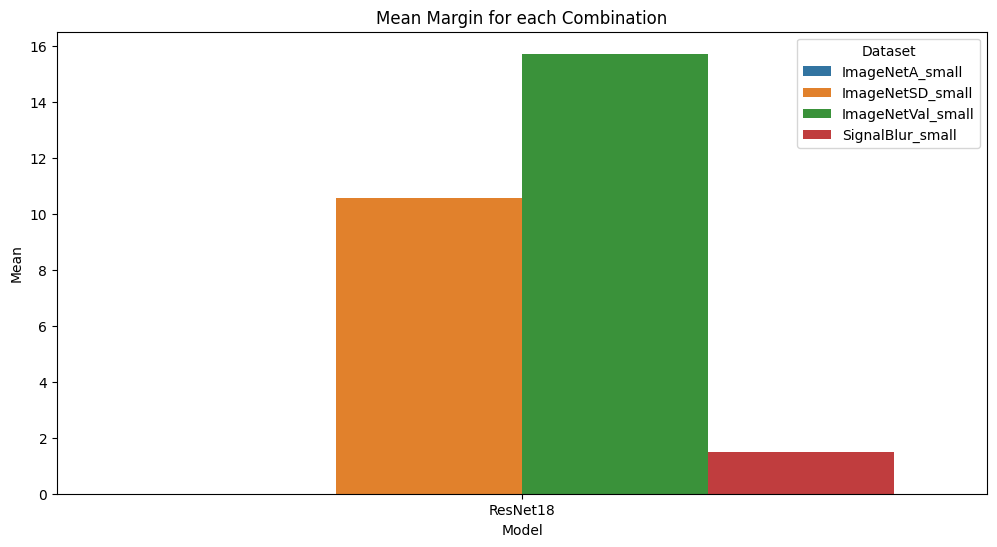

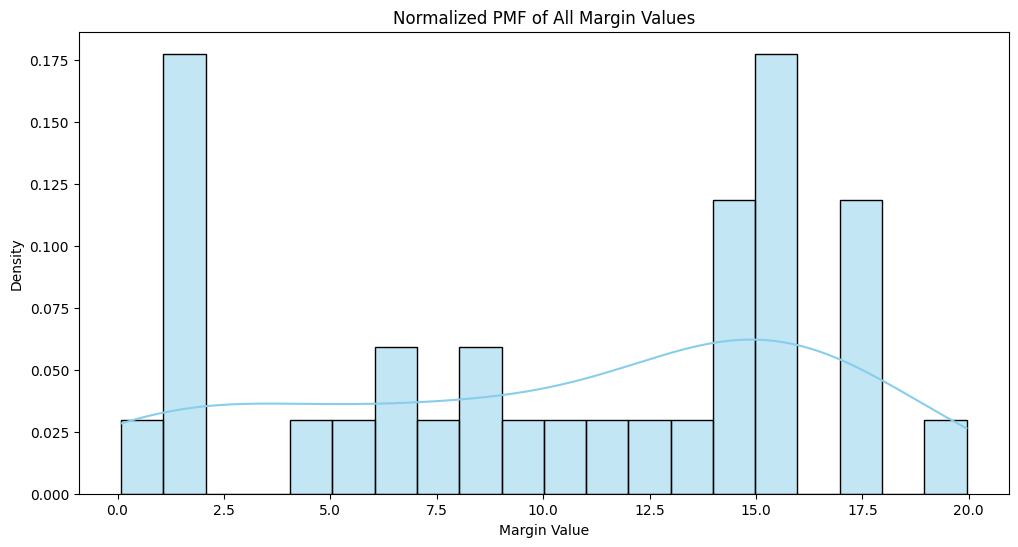

In [18]:
plot_combined('results\CambioMargin_1\margin_ResNet18.csv')